In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [36]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16, 10

import cPickle as pickle
from sklearn.preprocessing import StandardScaler
import networkx as nx


from code.featurize import sim_by_node

In [3]:
df = pickle.load(open('features.pkl', 'rb'))
df.index.name = 'node'
df.head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
node,,,,,,,,,,,
0,37.750067,-122.441075,718895.248337,-0.000153,-0.014650,0.158808,123.369982,-0.035714,1.806452,112,80.172298
1,37.750196,-122.438933,834313.797096,-0.002185,0.169033,-0.076971,105.325899,0.039474,2.375000,152,83.318625
2,37.756794,-122.436270,900225.127625,-0.012031,0.008118,0.125270,143.830470,-0.284672,1.902778,137,93.471872
3,37.753529,-122.437050,820289.998581,0.218998,0.471783,0.216543,110.432877,-0.019108,2.308824,157,91.519785
4,37.755758,-122.433400,776981.611641,-0.008045,-0.010146,0.052978,137.947900,-0.065789,2.140845,152,92.032526


In [11]:
ssc = StandardScaler()
fsc = ssc.fit_transform(df.iloc[:,2:])
fsc = pd.DataFrame(fsc)
fsc.columns = df.columns[2:]
fsc.index = df.index

print fsc.shape
fsc.head()

(7334, 9)


,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
node,,,,,,,,,
0,-0.143650,-0.350460,-0.445878,-0.435097,-0.312602,0.605849,0.103163,0.018275,-0.025533
1,-0.129873,-0.353792,-0.357719,-0.499936,-0.334623,0.761286,0.531302,0.302212,0.146457
2,-0.122005,-0.369935,-0.434951,-0.444320,-0.287633,0.091179,0.175701,0.195736,0.701471
3,-0.131547,0.008849,-0.212415,-0.419220,-0.328391,0.640179,0.481469,0.337704,0.594762
4,-0.136716,-0.363400,-0.443716,-0.464200,-0.294812,0.543675,0.354975,0.302212,0.622791


In [8]:
edges = pickle.load(open('edges.pkl'))
edges.head()

,node1,node2,dist
0,0,1086,0.001064
1,0,4952,0.001074
2,0,4067,0.001337
3,0,2729,0.001620
4,1,4952,0.001072


In [12]:
edges['sim'] = edges.apply(lambda x: sim_by_node(int(x.node1), int(x.node2), fsc), axis = 1)
edges.head()

,node1,node2,dist,sim
0,0,1086,0.001064,2.098700
1,0,4952,0.001074,1.767092
2,0,4067,0.001337,2.478210
3,0,2729,0.001620,1.348632
4,1,4952,0.001072,3.672129


In [34]:
edges.sort_values('sim').head()

,node1,node2,dist,sim
24058,6086,610,0.001768,0.036353
17060,4311,6087,0.004431,0.041095
1009,255,6086,0.001127,0.043231
24055,6086,255,0.001127,0.043231
12383,3122,1829,0.003996,0.043883


In [22]:
latlon = df[['lat', 'lon']]

CPU times: user 26.1 s, sys: 1.23 s, total: 27.3 s
Wall time: 30.9 s


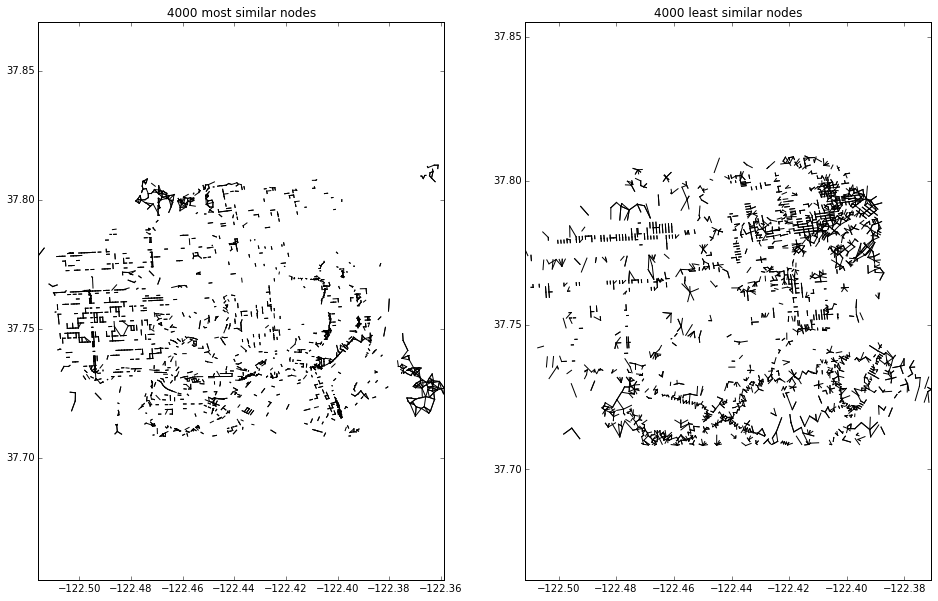

In [37]:
%%time
nleast = 4000
nmost = 4000


plt.subplot(1,2,1)
for idx in edges.sort_values('sim').index[-1*nmost:]:
    node1 = int(edges.ix[idx].node1)
    node2 = int(edges.ix[idx].node2)

    plt.plot([latlon.ix[node1].lon, latlon.ix[node2].lon], [latlon.ix[node1].lat, latlon.ix[node2].lat], c='black')

ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.axis('equal')
plt.margins(0)
plt.title('%d most similar nodes' % nmost)

plt.subplot(1,2,2)
for idx in edges.sort_values('sim').index[:nleast]:
    node1 = int(edges.ix[idx].node1)
    node2 = int(edges.ix[idx].node2)

    plt.plot([latlon.ix[node1].lon, latlon.ix[node2].lon], [latlon.ix[node1].lat, latlon.ix[node2].lat], c='black')

ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.axis('equal')
plt.margins(0)
plt.title('%d least similar nodes' % nleast)

In [39]:
sim = edges.groupby('node1').mean()['sim']
sim.head()

node1
0    1.923158
1    2.314381
2    2.405491
3    1.640719
4    2.909995
Name: sim, dtype: float64

In [45]:
sim.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333],
           dtype='int64', name=u'node1', length=7325)

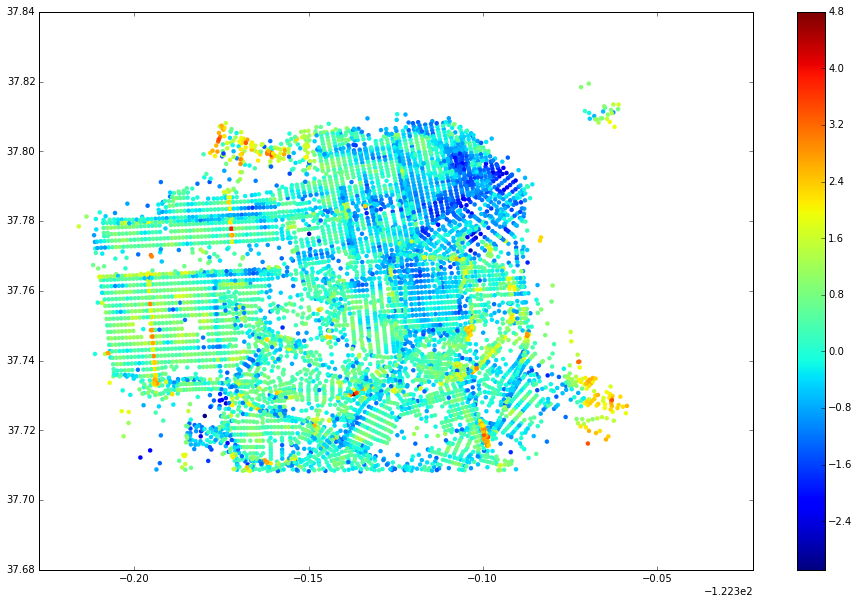

In [56]:
plt.scatter(df.ix[sim.index].lon, df.ix[sim.index].lat, c=np.log(sim.values),
            linewidths=0)
plt.colorbar()
# plt.clim(0,5)
plt.axis('equal');

Log of similarity plot. Color of each node reflects mean of similarity to connected nodes.

# Reduced and smoothed features

In [4]:
f = pickle.load(open('temp.pkl', 'rb'))

In [5]:
df = f.features
df.head()

,lat,lon,walkscore,population,popsmooth,avg_hh_size,housesmooth,sgnf,sgnfs
0,37.750067,-122.441075,80.172298,112,105.530049,1.806452,1.657426,-0.035714,-19.680947
1,37.750196,-122.438933,83.318625,152,111.101844,2.375000,1.838138,0.039474,-3.044294
2,37.756794,-122.436270,93.471872,137,125.264415,1.902778,1.832284,-0.284672,-31.554498
3,37.753529,-122.437050,91.519785,157,119.386578,2.308824,1.917590,-0.019108,-7.741078
4,37.755758,-122.433400,92.032526,152,129.730766,2.140845,1.909699,-0.065789,-18.118169


In [6]:
fdf = f.features[['popsmooth', 'housesmooth', 'sgnfs']]

ssc = StandardScaler()
fsc = ssc.fit_transform(fdf)
fsc = pd.DataFrame(fsc)
fsc.columns = fdf.columns
fsc.index = df.index

print fsc.shape
fsc.head()

(7334, 3)


,popsmooth,housesmooth,sgnfs
0,-0.102338,-0.017894,0.438568
1,0.043369,0.253293,1.105330
2,0.413731,0.244508,-0.037298
3,0.260021,0.372523,0.917093
4,0.530529,0.360681,0.501201


In [9]:
edges['sim'] = edges.apply(lambda x: sim_by_node(int(x.node1), int(x.node2), fdf), axis = 1)
edges.head()

,node1,node2,dist,sim
0,0,1086,0.001064,0.554613
1,0,4952,0.001074,0.492022
2,0,4067,0.001337,0.452270
3,0,2729,0.001620,0.584431
4,1,4952,0.001072,0.248533


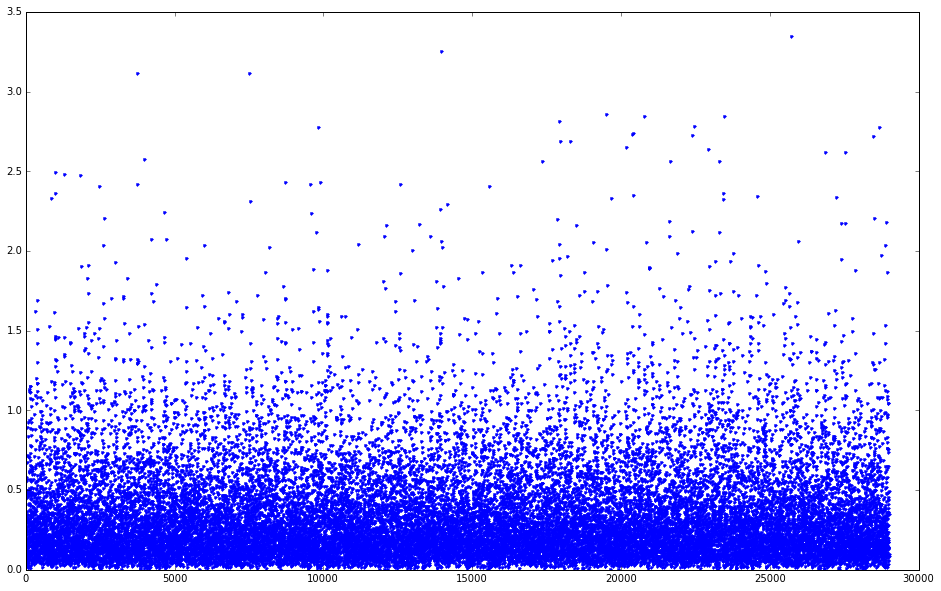

In [10]:
plt.plot(edges.sim, '.');

In [11]:
sim = edges.groupby('node1').mean()['sim']
sim.head()

node1
0    0.520834
1    0.246396
2    0.237984
3    0.247204
4    0.202298
Name: sim, dtype: float64

/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


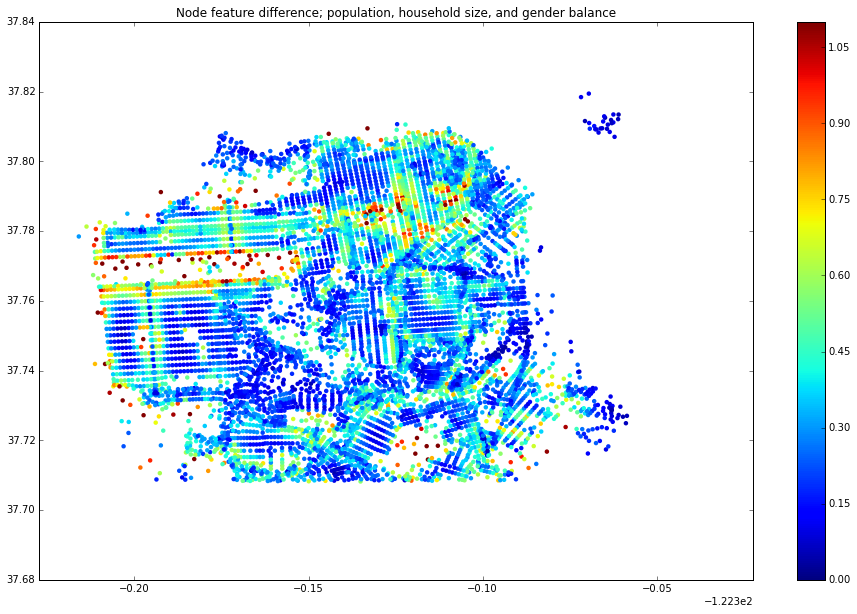

In [12]:
plt.scatter(df.ix[sim.index].lon, df.ix[sim.index].lat, c=sim.values,
            linewidths=0)
plt.colorbar()
plt.clim(0,1.1)
plt.axis('equal')
plt.title('Node feature difference; population, household size, and gender balance');
# lower values, more similar

# cut on edges, not average on nodes

In [15]:
def avgll(node1, node2, df):
    node1 = int(node1)
    node2 = int(node2)
    lat = 0.5 * (df.ix[node1].lat + df.ix[node2].lat)
    lon = 0.5 * (df.ix[node1].lon + df.ix[node2].lon)
    return lat, lon

avgll(edges.ix[0].node1, edges.ix[0].node2, df)

(37.75003615, -122.44160605)

In [19]:
edges['ll'] = edges.apply(lambda x: avgll(x.node1, x.node2, df), axis = 1).apply(pd.Series)
edges.head()

,node1,node2,dist,sim,ll
0,0,1086,0.001064,0.554613,"(37.75003615, -122.44160605)"
1,0,4952,0.001074,0.492022,"(37.7500996, -122.44053915)"
2,0,4067,0.001337,0.452270,"(37.7506497, -122.44140205)"
3,0,2729,0.001620,0.584431,"(37.74943155, -122.44157825)"
4,1,4952,0.001072,0.248533,"(37.75016425, -122.4394681)"


In [25]:
edges.drop('ll', axis = 1, inplace=True)
edges.head()

,node1,node2,dist,sim,lat,lon
0,0,1086,0.001064,0.554613,37.750036,-122.441606
1,0,4952,0.001074,0.492022,37.750100,-122.440539
2,0,4067,0.001337,0.452270,37.750650,-122.441402
3,0,2729,0.001620,0.584431,37.749432,-122.441578
4,1,4952,0.001072,0.248533,37.750164,-122.439468


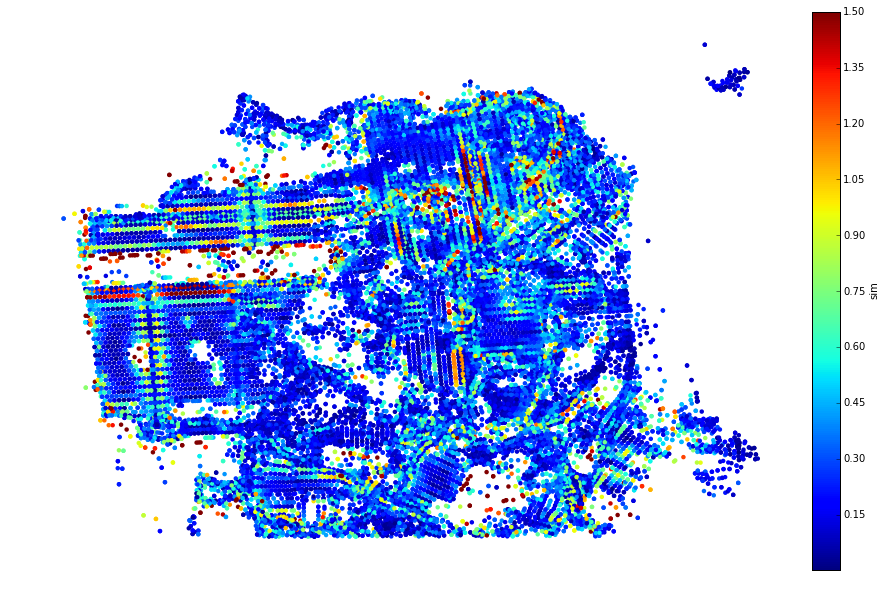

In [35]:
edges.plot(kind='scatter', x = 'lon', y='lat', c='sim', cmap='jet', linewidth=0, vmax=1.5)
plt.axis('equal')
plt.axis('off')
plt.margins(0)

# parallel test

In [108]:
%run code/nxparallel.py


Computing betweenness centrality for:
Name: barabasi_albert_graph(1000,3)
Type: Graph
Number of nodes: 1000
Number of edges: 2991
Average degree:   5.9820
	Parallel version
		Time: 6.3330
		Betweenness centrality for node 0: 0.00966
	Non-Parallel version
		Time: 7.2097 seconds
		Betweenness centrality for node 0: 0.00966

Computing betweenness centrality for:
Name: gnp_random_graph(1000,0.01)
Type: Graph
Number of nodes: 1000
Number of edges: 5026
Average degree:  10.0520
	Parallel version
		Time: 5.9869
		Betweenness centrality for node 0: 0.00166
	Non-Parallel version
		Time: 8.4536 seconds
		Betweenness centrality for node 0: 0.00166

Computing betweenness centrality for:
Name: watts_strogatz_graph(1000,4,0.1)
Type: Graph
Number of nodes: 1000
Number of edges: 2000
Average degree:   4.0000
	Parallel version
		Time: 4.0739
		Betweenness centrality for node 0: 0.04109
	Non-Parallel version
		Time: 7.3273 seconds
		Betweenness centrality for node 0: 0.04109



In [116]:
g = nx.from_pandas_dataframe(edges.sort_values(['lat', 'lon']).iloc[:10000,:], source='node1', target='node2', edge_attr='sim')
print nx.info(g)
print 'Number connected components:', len(max(nx.connected_components(g), key=len))

Name: 
Type: Graph
Number of nodes: 2590
Number of edges: 6049
Average degree:   4.6710
Number connected components: 2586


In [119]:
%time ebcp = betweenness_centrality_parallel(g)

CPU times: user 2.18 s, sys: 224 ms, total: 2.4 s
Wall time: 31.4 s


In [118]:
%time ebc = nx.edge_betweenness_centrality(g, weight = 'sim')

CPU times: user 1min 46s, sys: 6.52 s, total: 1min 52s
Wall time: 1min 51s


In [121]:
print len(ebcp.values()), len(ebcp.keys())
print len(ebc.values()), len(ebcp.keys())

2590 2590
6049 2590


Numbrer of edges does not match in results!, parallel version has edges = nodes, non-parallel has edges = edges

# into graph

In [123]:
edges.sort_values('sim', ascending=False).head()

,node1,node2,dist,sim,lat,lon
25716,6505,5160,0.005206,3.348822,37.770818,-122.491117
13941,3520,5467,0.004552,3.254164,37.771942,-122.468731
3741,943,1891,0.003466,3.118390,37.772182,-122.476614
7512,1891,943,0.003466,3.118390,37.772182,-122.476614
19506,4934,5467,0.003844,2.859777,37.772378,-122.468060


In [153]:
g = nx.from_pandas_dataframe(edges, source='node1', target='node2', edge_attr='sim')
print nx.info(g)
print 'Number of clusters:', nx.number_connected_components(g)
print 'Largest cluster:', len(max(nx.connected_components(g), key=len))

Name: 
Type: Graph
Number of nodes: 7325
Number of edges: 17038
Average degree:   4.6520
Number of clusters: 5
Largest cluster: 7295


In [158]:
edsort = edges.sort_values('sim', ascending=False).iloc[5000:,:]
g = nx.from_pandas_dataframe(edsort, source='node1', target='node2', edge_attr='sim')
print nx.info(g)
print 'Number of clusters:', nx.number_connected_components(g)
print 'Largest cluster:', len(max(nx.connected_components(g), key=len))

Name: 
Type: Graph
Number of nodes: 7264
Number of edges: 13797
Average degree:   3.7987
Number of clusters: 43
Largest cluster: 6760


In [159]:
%time ebc = nx.edge_betweenness_centrality(g, weight = 'sim')

CPU times: user 12min 32s, sys: 58.8 s, total: 13min 31s
Wall time: 13min 24s


In [160]:
pickle.dump(ebc, open('ebc.pkl', 'wb'))

In [161]:
ebcdf = pd.DataFrame(ebc, index=['betweenness'])
ebcdf = ebcdf.T
ebcdf = ebcdf.reset_index()
ebcdf.columns = ['node1', 'node2', 'betweenness']
ebcdf[['lat', 'lon']] = ebcdf.apply(lambda x: avgll(x.node1, x.node2, df), axis = 1).apply(pd.Series)
ebcdf.sort_values('betweenness').head()

,node1,node2,betweenness,lat,lon
0,0,4067,0.000294,37.750650,-122.441402
1,0,4952,0.000230,37.750100,-122.440539
2,0,6339,0.000001,37.749097,-122.440923
3,1,598,0.001426,37.750780,-122.439258
4,1,1092,0.001318,37.749646,-122.438062


In [170]:
ebcdf.sort_values('betweenness', ascending=False).head()

,node1,node2,betweenness,lat,lon
11814,4869,6141,0.156051,37.736239,-122.425458
1122,306,4869,0.150521,37.736430,-122.426015
30,7,539,0.125203,37.734344,-122.439751
4952,1521,1728,0.121197,37.736380,-122.435066
31,7,608,0.120694,37.735205,-122.438977


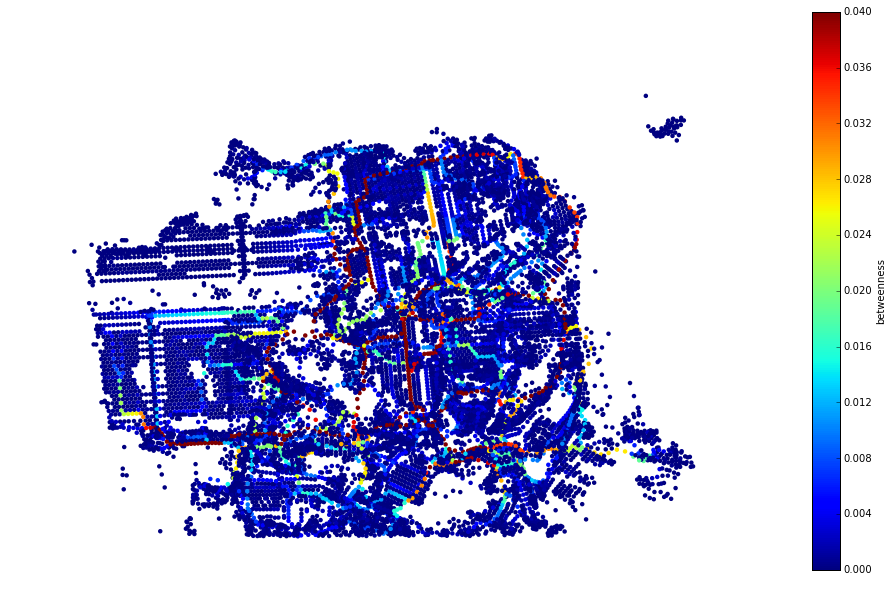

In [165]:
ebcdf.plot(kind='scatter', x='lon', y='lat', c='betweenness',
           cmap='jet', linewidths=0, vmax=0.04)
plt.margins(0)
plt.axis('equal')
plt.axis('off');

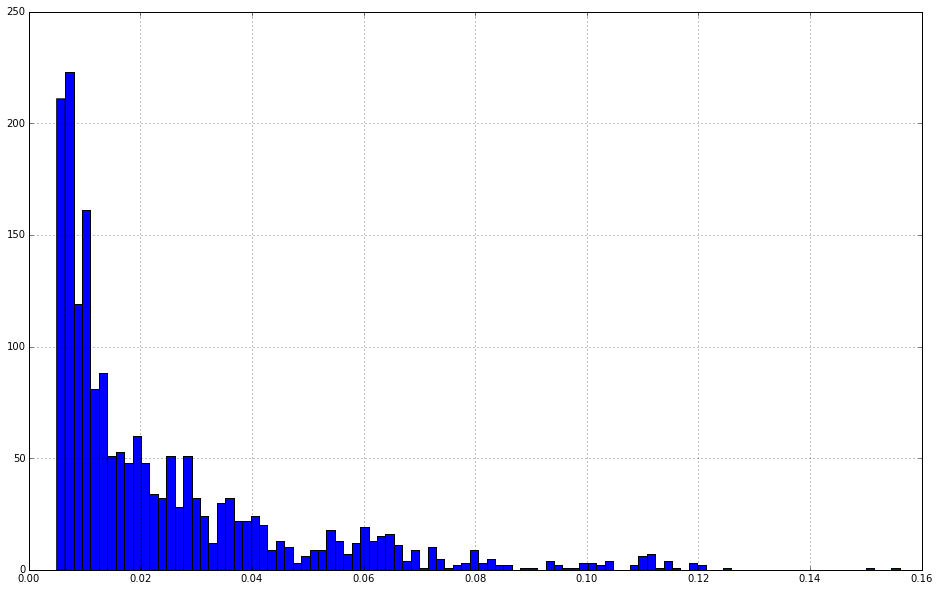

In [168]:
ebcdf.betweenness[ebcdf.betweenness > 0.005].hist(bins=100)

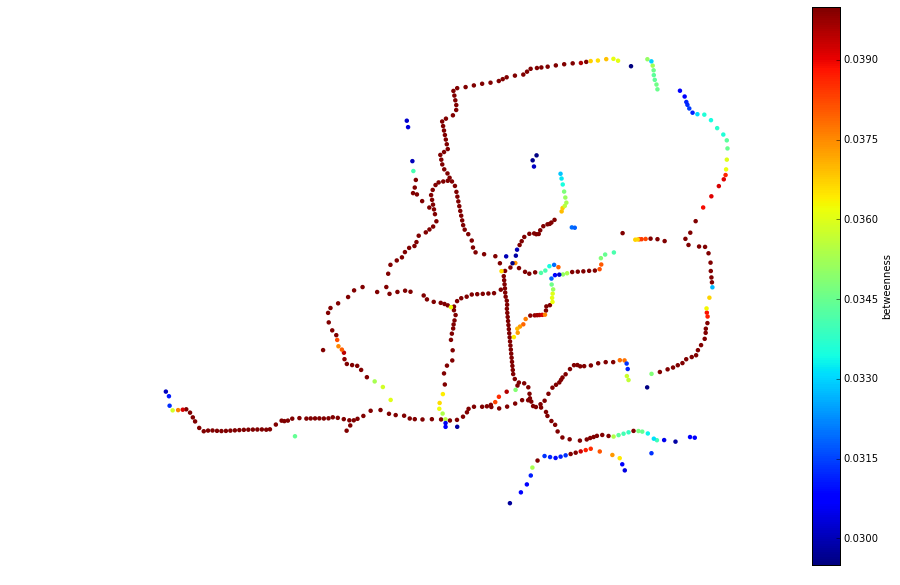

In [176]:
ebcdf.sort_values('betweenness', ascending=False).iloc[:500,:].plot(kind='scatter', x='lon', y='lat', c='betweenness',
           cmap='jet', linewidths=0, vmax=0.04)
plt.margins(0)
plt.axis('equal')
plt.axis('off');

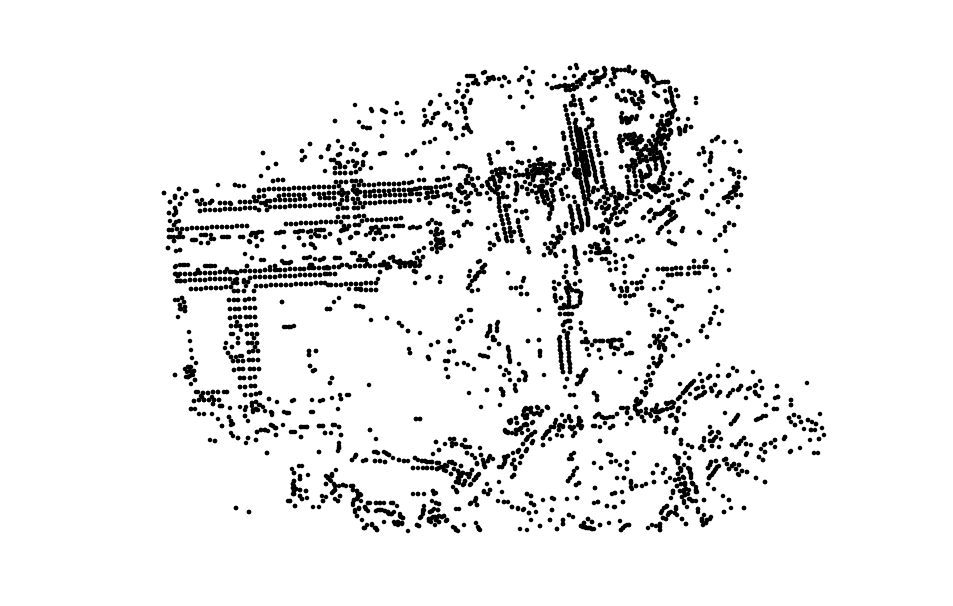

In [217]:
# initially removed highest distance:
edges.sort_values('sim', ascending=False).iloc[:5000,:].plot(kind='scatter', x='lon', y='lat', c='black',
           linewidths=0)
plt.margins(0)
plt.axis('equal')
plt.axis('off');

# betweenness on full dataset

In [177]:
g = nx.from_pandas_dataframe(edges, source='node1', target='node2', edge_attr='sim')
print nx.info(g)
print 'Number of clusters:', nx.number_connected_components(g)
print 'Largest cluster:', len(max(nx.connected_components(g), key=len))

Name: 
Type: Graph
Number of nodes: 7325
Number of edges: 17038
Average degree:   4.6520
Number of clusters: 5
Largest cluster: 7295


In [178]:
%time ebc = nx.edge_betweenness_centrality(g, weight = 'sim')

CPU times: user 15min 24s, sys: 1min 3s, total: 16min 27s
Wall time: 16min 12s


In [182]:
pickle.dump(ebc, open('ebc.pkl', 'wb'))

In [179]:
ebcdf = pd.DataFrame(ebc, index=['betweenness'])
ebcdf = ebcdf.T
ebcdf = ebcdf.reset_index()
ebcdf.columns = ['node1', 'node2', 'betweenness']
ebcdf[['lat', 'lon']] = ebcdf.apply(lambda x: avgll(x.node1, x.node2, df), axis = 1).apply(pd.Series)
ebcdf.sort_values('betweenness').head()

,node1,node2,betweenness,lat,lon
4033,951,5942,3.727984e-08,37.810446,-122.365660
11214,3228,5779,3.727984e-08,37.725956,-122.358845
8772,2337,3587,3.727984e-08,37.725126,-122.459666
9217,2504,4168,3.727984e-08,37.773426,-122.442577
12292,3703,4134,3.727984e-08,37.709255,-122.394967


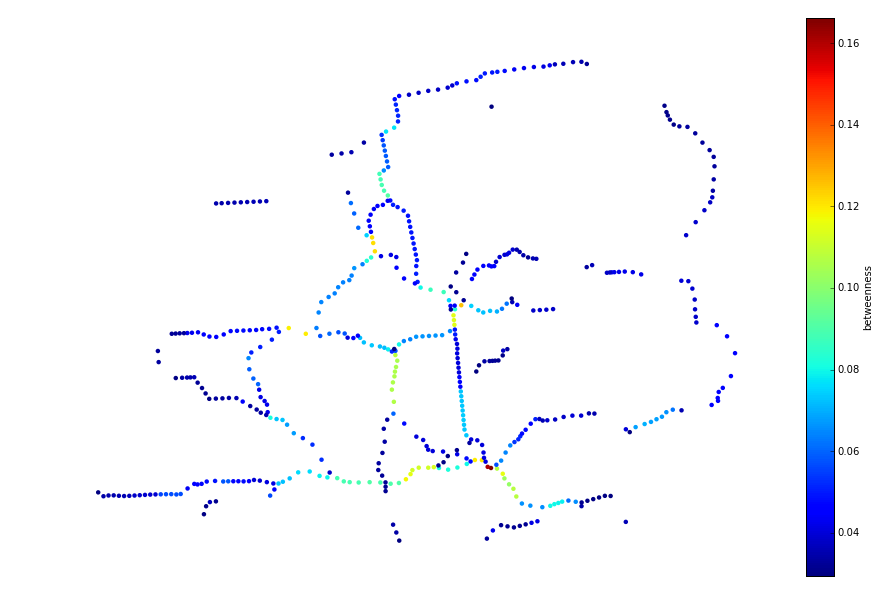

In [188]:
cuts = ebcdf.sort_values('betweenness', ascending=False).iloc[:500,:]
cuts.plot(kind='scatter', x='lon', y='lat', c='betweenness',
           cmap='jet', linewidths=0)
plt.margins(0)
plt.axis('equal')
plt.axis('off');

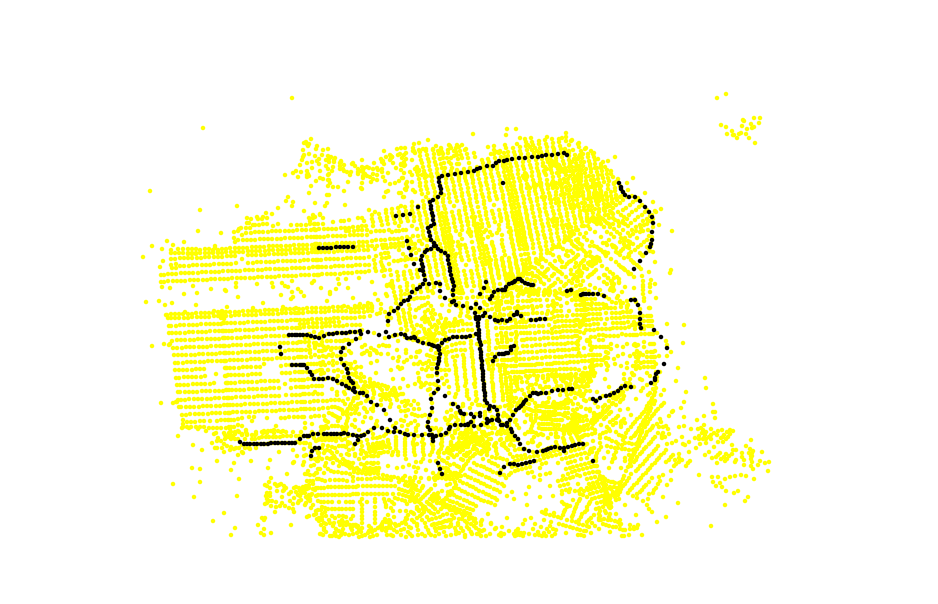

In [197]:
cuts = ebcdf.sort_values('betweenness', ascending=False).iloc[:500,:]
plt.scatter(df.lon, df.lat, c='yellow', linewidths=0)
plt.scatter(cuts.lon, cuts.lat, c='black', linewidths=0)
plt.margins(0)
plt.axis('equal')
plt.axis('off');

# remove edges

In [198]:
print nx.info(g)
print 'Number of clusters:', nx.number_connected_components(g)
print 'Largest cluster:', len(max(nx.connected_components(g), key=len))

Name: 
Type: Graph
Number of nodes: 7325
Number of edges: 17038
Average degree:   4.6520
Number of clusters: 5
Largest cluster: 7295


In [201]:
cuts.head()

,node1,node2,betweenness,lat,lon
14597,4869,6141,0.166229,37.736239,-122.425458
1379,306,4869,0.160627,37.736430,-122.426015
761,165,3618,0.126169,37.763585,-122.430455
4040,953,3551,0.121512,37.772646,-122.444966
4042,953,6688,0.121491,37.774042,-122.445249


In [202]:
cuts.apply(lambda x: g.remove_edge(x.node1, x.node2), axis=1)

14597    None
1379     None
761      None
4040     None
4042     None
16536    None
10174    None
1378     None
9510     None
11054    None
33       None
1841     None
34       None
3598     None
15858    None
3600     None
6111     None
6838     None
14642    None
2613     None
813      None
189      None
7341     None
7848     None
9886     None
2311     None
512      None
4549     None
4548     None
513      None
         ... 
7690     None
14159    None
6737     None
5764     None
16182    None
16810    None
12394    None
2425     None
14160    None
12260    None
5803     None
8177     None
15060    None
12392    None
11702    None
5800     None
53       None
3621     None
13060    None
7507     None
55       None
7503     None
4260     None
14598    None
7662     None
472      None
12150    None
2182     None
2185     None
15993    None
dtype: object

In [205]:
print nx.info(g)
print 'Number of clusters:', nx.number_connected_components(g)
print 'Largest cluster:', len(max(nx.connected_components(g), key=len))

Name: 
Type: Graph
Number of nodes: 7325
Number of edges: 16538
Average degree:   4.5155
Number of clusters: 6
Largest cluster: 7294


In [206]:
%time ebc2 = nx.edge_betweenness_centrality(g, weight = 'sim')

CPU times: user 15min 36s, sys: 1min 8s, total: 16min 45s
Wall time: 16min 32s


In [209]:
pickle.dump(ebc2, open('ebc.pkl', 'wb'))

In [207]:
ebcdf = pd.DataFrame(ebc2, index=['betweenness'])
ebcdf = ebcdf.T
ebcdf = ebcdf.reset_index()
ebcdf.columns = ['node1', 'node2', 'betweenness']
ebcdf[['lat', 'lon']] = ebcdf.apply(lambda x: avgll(x.node1, x.node2, df), axis = 1).apply(pd.Series)
ebcdf.sort_values('betweenness', ascending=True).head()

,node1,node2,betweenness,lat,lon
9507,2708,3202,3.727984e-08,37.721460,-122.448180
4126,1013,3404,3.727984e-08,37.768618,-122.391413
12339,3930,7139,3.727984e-08,37.757335,-122.443534
4174,1027,2031,3.727984e-08,37.711045,-122.455942
12399,3961,4541,3.727984e-08,37.715855,-122.398679


In [219]:
ebcdf.sort_values('betweenness', ascending=False).head()

,node1,node2,betweenness,lat,lon
11816,3675,4959,0.127519,37.734161,-122.447102
10337,3051,3240,0.110672,37.736310,-122.455862
10888,3240,7030,0.109917,37.737710,-122.457896
2787,676,3783,0.104471,37.736465,-122.452718
10440,3079,6959,0.104264,37.756975,-122.442840


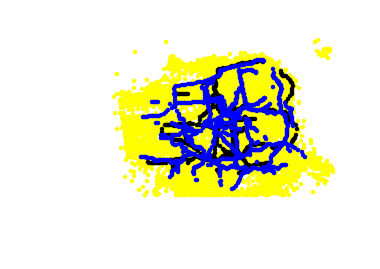

In [233]:
%matplotlib inline

cuts2 = ebcdf.sort_values('betweenness', ascending=False).iloc[:1000,:]
plt.scatter(df.lon, df.lat, c='yellow', linewidths=0)
plt.scatter(cuts.lon, cuts.lat, c='black', linewidths=0)
plt.scatter(cuts2.lon, cuts2.lat, c='blue', linewidths=0)
plt.margins(0)
plt.axis('equal')
plt.axis('off');

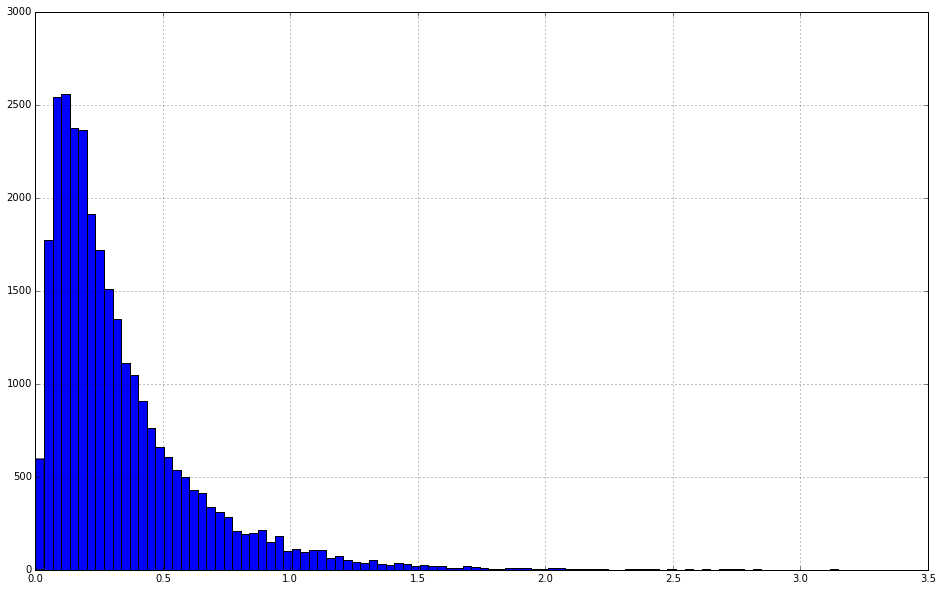

In [228]:
edges.sim.hist(bins=100)